In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
import numpy as np
import ast
from new_utils import calculate_cumulative_gain_ratio
import matplotlib.pyplot as plt

In [79]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'new_combined_data.csv'


# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Now you can work with the DataFrame 'df' as needed
# print(df.head())  

In [80]:
teams_gain_ratios = {}

for index, row in df.iterrows():
    team_name = row['team_name']

    team_wins_string = row['wins']
    team_wins = ast.literal_eval(team_wins_string)

    exp_team_wins_string = row['exp_wins']
    exp_team_wins = ast.literal_eval(exp_team_wins_string)

    team_matches_home_string = row['matches_home']
    team_matches_home = ast.literal_eval(team_matches_home_string)

    cum_gain_ratio = calculate_cumulative_gain_ratio(team_wins, exp_team_wins, team_matches_home, True)

    teams_gain_ratios[team_name] = cum_gain_ratio




In [81]:
# Sorting the dictionary in order to have the teams with higher gain ratio on top x[1][-1] stands for
# "order my dict according to the last element [-1] of the value of the dict (key->[0], value->[1]) "

sorted_teams_gain_ratios = dict(sorted(teams_gain_ratios.items(), key=lambda x: x[1][-1], reverse=True))

print(sorted_teams_gain_ratios)

{'Frosinone': [0.0, 2.375, 1.875, 1.25, 1.225, 1.0772727272727274, 1.1], 'Aston Villa': [1.62, 0.8675000000000002, 1.0116666666666667, 0.9900000000000001, 1.0188888888888892, 0.9700000000000002], 'Wolverhampton Wanderers': [0.0, 0.0, 1.6666666666666667, 1.4285714285714286, 1.1111111111111112, 1.1818181818181819, 0.9285714285714286], 'Valencia': [4.8, 2.4, 2.125, 1.4166666666666667, 1.1366666666666667, 1.0754545454545454, 0.91], 'Newcastle United': [0.0, 0.3875, 0.47500000000000003, 0.53625, 0.6990000000000001, 0.7866666666666667, 0.8730769230769232], 'AS Monaco': [1.7999999999999998, 1.2366666666666666, 0.742, 1.0016666666666667, 0.9175, 0.901, 0.8161538461538461], 'FC Heidenheim': [0.0, 0.575, 0.8833333333333333, 0.6625, 0.9629999999999999, 0.8024999999999999], 'VfL Wolfsburg': [1.57, 0.9550000000000001, 0.9783333333333334, 0.73375, 0.587, 0.8016666666666667], 'Atlético Madrid': [1.29, 0.818, 0.5842857142857143, 0.7425, 0.7290000000000001, 0.7183333333333334, 0.7653846153846154], 'Bol

In [82]:
#Filter the teams with best performance

N = 20  # Specify the number of teams you want

# Using list comprehension to create a new dictionary with the first N items
# best_teams = dict(list(sorted_teams_gain_ratios.items())[:N])

best_teams = {key: value for key, value in sorted_teams_gain_ratios.items() if value[-1] > 1}

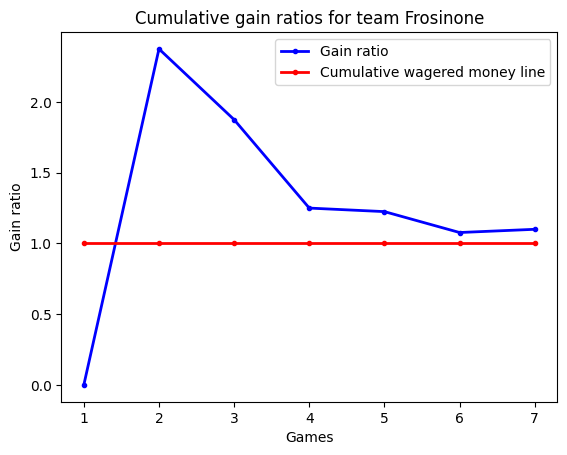

In [83]:
#Plotting best teams performance

index = 1

for key, value in best_teams.items():
    # print(f'Key: {key}, Value: {value}')
    # Create a scatter plot with connecting lines for the cumulative gain ratio
    plt.figure(index)
    x = range(1, len(value) + 1)
    plt.plot(x, value, color='blue', marker='.', linestyle='-', linewidth=2, label='Gain ratio')

    # Create a scatter plot with connecting lines for the reference line
    plt.plot(x, np.ones(len(value)), color='red', marker='.', linestyle='-', linewidth=2, label='Cumulative wagered money line')


    # Adding labels and title
    plt.xlabel('Games')
    plt.ylabel('Gain ratio')
    plt.title(f'Cumulative gain ratios for team {key}')
    # plt.xticks(converted_dates[::2])
    plt.legend()
    index +=1
# Show the plot
plt.show()